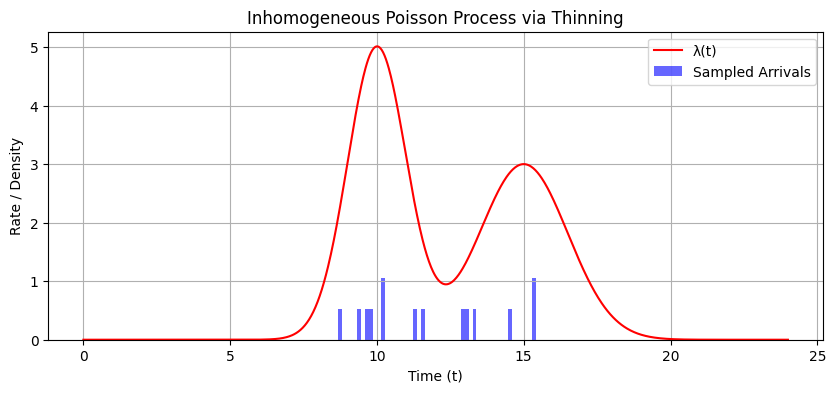

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define your inhomogeneous rate function λ(t)
def lambda_t(t):
    return 5 * np.exp(-0.5 * (t - 10)**2) + 3 * np.exp(-0.5 * ((t - 15)/1.5)**2)

# Thinning algorithm
def thinning_sampler(lambda_func, lambda_max, t_max):
    arrivals = []
    t = 0
    while t < t_max:
        # Step forward in time using exponential with lambda_max
        t += np.random.exponential(1 / lambda_max)
        if t >= t_max:
            break
        # Accept with probability λ(t) / λ_max
        u = np.random.uniform(0, 1)
        if u < lambda_func(t) / lambda_max:
            arrivals.append(t)
    return np.array(arrivals)

# Parameters
# lambda_max = 8  # must be >= max(lambda(t))
t_max = 24      # simulate over 24 hours
t_vals = np.linspace(0, 24, 1000)
lambda_vals = lambda_t(t_vals)
lambda_max = np.max(lambda_vals)


# Run the sampler
samples = thinning_sampler(lambda_func=lambda_t, lambda_max=lambda_max, t_max=t_max)

# Plot the result
t_vals = np.linspace(0, t_max, 1000)
plt.figure(figsize=(10, 4))
plt.plot(t_vals, lambda_t(t_vals), label="λ(t)", color='red')
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Sampled Arrivals", color='blue')
plt.title("Inhomogeneous Poisson Process via Thinning")
plt.xlabel("Time (t)")
plt.ylabel("Rate / Density")
plt.legend()
plt.grid(True)
plt.show()


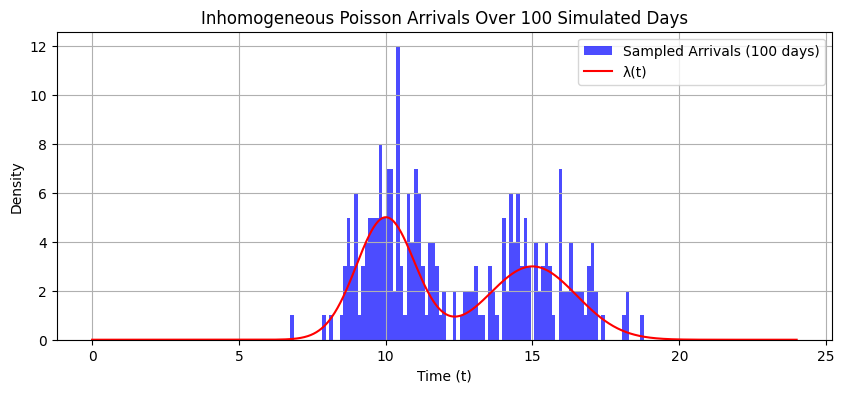

In [25]:
all_samples = []
for _ in range(10):  # simulate 100 days
    s = thinning_sampler(lambda_func=lambda_t, lambda_max=lambda_max, t_max=24)
    all_samples.extend(s)
plt.figure(figsize=(10, 4))
plt.hist(all_samples, bins=100, alpha=0.7, color='blue', label='Sampled Arrivals (100 days)')
plt.plot(t_vals, lambda_t(t_vals), label="λ(t)", color='red')
plt.xlabel('Time (t)')
plt.ylabel('Density')
plt.title('Inhomogeneous Poisson Arrivals Over 100 Simulated Days')
plt.legend()
plt.grid(True)
plt.show()